In [1]:
import torch
from data.ellipse import Ellipse
from vae import VAE
from collapse import FeatureCollapser
import matplotlib.pyplot as plt
device = torch.device('cuda')

### get data

In [2]:
ellipse = Ellipse('./data/ellipses.npy',device)

### get VAE

In [3]:
vae = VAE(128).to(device)
vae.load_state_dict(torch.load('../ellipse/model/generator.pt'))

<All keys matched successfully>

### get feature collapser

In [4]:
fc = FeatureCollapser(ellipse.ar, vae)

### collapse (aspect ratio as an example)

In [5]:
new_X = fc.fit_transform(ellipse.X, 1e-2, 1000)

100/1000 200/1000 300/1000 400/1000 500/1000 600/1000 700/1000 800/1000 900/1000 1000/1000 

### original

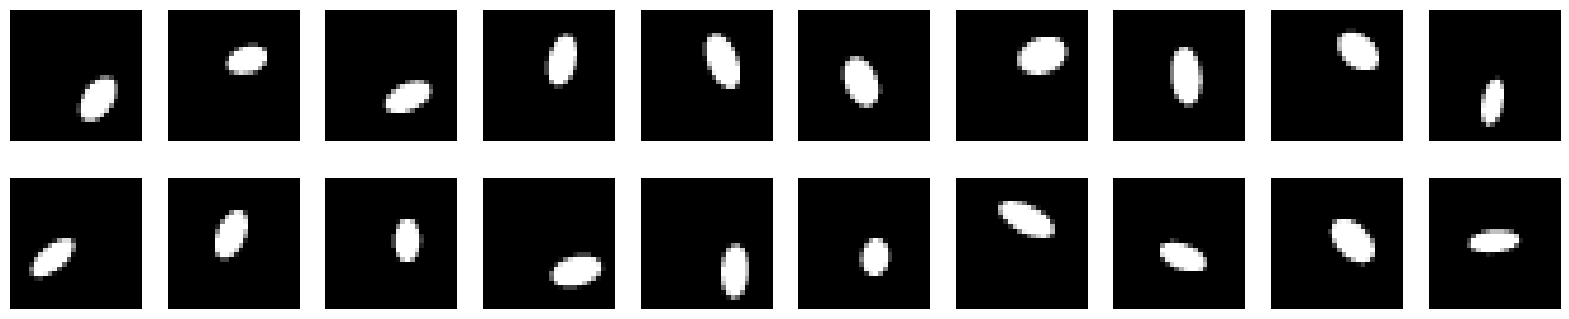

In [6]:
f, ax = plt.subplots(2,10,figsize=(20,4))
for i in range(20):
    ax[i//10][i%10].imshow(ellipse.X[i].squeeze().cpu().detach(),cmap='gray')
    ax[i//10][i%10].axis('off')

### after collapse

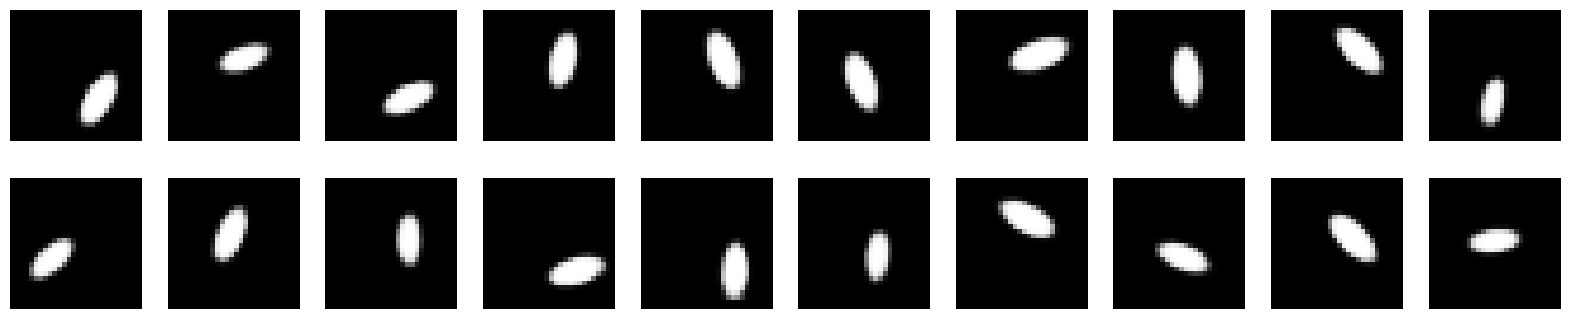

In [7]:
f, ax = plt.subplots(2,10,figsize=(20,4))
for i in range(20):
    ax[i//10][i%10].imshow(new_X[i].squeeze().cpu().detach(),cmap='gray')
    ax[i//10][i%10].axis('off')